In [9]:
from joblib import Parallel, delayed
import multiprocessing
import time
# what are your inputs, and what operation do you want to
# perform on each input. For example...


def processInput(i):
    return i * i

inputs = range(1000000)

start_time = time.time()
result_list = []
for i in inputs:
    result_list.append(processInput(i))
print("Single core: {} seconds.".format(time.time() - start_time))

start_time = time.time()
num_cores = 1
results = Parallel(n_jobs=num_cores)(delayed(processInput)(i) for i in inputs)
print("Multi core: {} seconds.".format(time.time() - start_time))


Single core: 0.316784143448 seconds.


KeyboardInterrupt: 

In [18]:
import numpy as np
from joblib import Parallel, delayed

def parallel_dot(A,B,n_jobs=2):
    """
     Computes A x B using more CPUs.
     This works only when the number 
     of rows of A and the n_jobs are even.
    """
    parallelizer = Parallel(n_jobs=n_jobs)
    # this iterator returns the functions to execute for each task
    tasks_iterator = ( delayed(np.dot)(A_block,B) 
                      for A_block in np.split(A,n_jobs) )
    result = parallelizer( tasks_iterator )
    # merging the output of the jobs
    return np.vstack(result)

A = np.random.randint(0,high=10,size=(10000,10000))
B = np.random.randint(0,high=10,size=(10000,10000))
%time _ = np.dot(A,B)
# CPU times: user 13.2 s, sys: 36 ms, total: 13.2 s
# Wall time: 13.4 s
%time _ = parallel_dot(A,B,n_jobs=10)
# CPU times: user 92 ms, sys: 76 ms, total: 168 ms
# Wall time: 8.49 s

CPU times: user 2h 44min 15s, sys: 352 ms, total: 2h 44min 15s
Wall time: 2h 44min 15s
CPU times: user 24.3 s, sys: 4.13 s, total: 28.4 s
Wall time: 44min 24s


In [56]:
from __future__ import division

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
from sklearn.metrics import accuracy_score
import pandas as pd
import time

start_time = time.time()
iters = 100000
num_days = 1260
accs = []

target_series = np.random.randint(3, size=num_days)

for i in range(iters):
    accs.append(accuracy_score(target_series, np.random.randint(3, size=num_days)))

print("{} seconds.".format(time.time() - start_time))

16.0347537994 seconds.


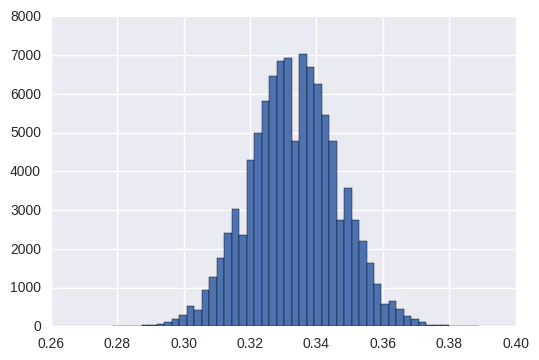

In [57]:
pd.Series(accs).hist(bins=50)

In [58]:
pd.Series(accs).describe()

count    100000.000000
mean          0.333384
std           0.013288
min           0.276190
25%           0.324603
50%           0.333333
75%           0.342063
max           0.388889
dtype: float64

In [59]:
print(np.mean(accs) + 2.33 * np.std(accs))

0.364344008292


In [120]:
def inverse_percentile(arr, num):
    arr = sorted(arr)
    i_arr = [i for i, x in enumerate(arr) if x > num]
   
    return i_arr[0] / len(arr) if len(i_arr) > 0 else 1

print(inverse_percentile(accs, 0.3246))


0.24449


In [52]:
from math import sqrt
start_time = time.time()
[sqrt(i ** 2) for i in range(1000000)]
print(time.time()  - start_time)

0.265527009964


In [53]:
from joblib import Parallel, delayed
start_time = time.time()
Parallel(n_jobs=2)(delayed(sqrt)(i ** 2) for i in range(1000000))
print(time.time()  - start_time)

43.3173577785


In [54]:
import numpy as np
from matplotlib.path import Path
from joblib import Parallel, delayed
import time
import sys

## Check if one line segment contains another. 

def check_paths(path):
    for other_path in a:
        res='no cross'
        chck = Path(other_path)
        if chck.contains_path(path)==1:
            res= 'cross'
            break
    return res

if __name__ == '__main__':
    ## Create pairs of points for line segments
    a = zip(np.random.rand(5000,2),np.random.rand(5000,2))
    b = zip(np.random.rand(300,2),np.random.rand(300,2))

    now = time.time()
    if len(sys.argv) >= 2:
        res = Parallel(n_jobs=int(sys.argv[1])) (delayed(check_paths) (Path(points)) for points in b)
    else:
        res = [check_paths(Path(points)) for points in b]
    print "Finished in", time.time()-now , "sec"

ValueError: invalid literal for int() with base 10: '-f'

In [55]:
sys.argv

['/home/calvinjku/anaconda2/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py',
 '-f',
 '/run/user/1000/jupyter/kernel-39f5ad22-b91b-4546-8a10-6f466a0c3c32.json']

In [122]:
import random


In [127]:
random_choice = random.choice([1, 2])
print(random_choice)

2
